In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn import metrics
import HfuncTS
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import classification_report


In [2]:
# Import del dataset

dati = pd.read_excel('ADIPOSITE2019.xlsx')

In [3]:
dati.describe()


,Unnamed: 0,Sieroteca,codice studio,NT,Copeptin,Vit. D,Granzyme B,Adiponectina,PiiNP pg/ml,PCR,...,vitaAltezza,operati Silecchia,ANGP3 Tessuto adiposo,ANGP3 Tessuto epatico,ANGP4 Tessuto adiposo,ANGP4 Tessuto epatico,ANGP8 Tessuto adiposo,ANGP8 Tessuto epatico,LPL Tessuto adiposo,LPL Tessuto epatico
count,0.0,50.00000,80.0,50.000000,50.000000,49.000000,36.000000,0.0,23.000000,0.0,...,0.0,60.0,38.000000,39.000000,61.000000,39.000000,38.000000,39.000000,61.000000,39.000000
mean,NaN,25.50000,1.0,182.299687,8.968800,15.172857,19.818056,NaN,6009.130000,NaN,...,NaN,1.0,0.006351,0.063501,1.447520,0.373841,0.024903,0.071791,4.198687,0.000431
std,NaN,14.57738,0.0,85.584643,5.041415,7.805224,17.053545,NaN,5927.367289,NaN,...,NaN,0.0,0.027313,0.130003,10.583707,0.449031,0.142744,0.085904,31.359203,0.001024
min,NaN,1.00000,1.0,65.697988,3.070000,4.000000,1.360000,NaN,498.020000,NaN,...,NaN,1.0,0.000000,0.000000,0.000000,0.001100,0.000000,0.000000,0.000683,0.000000
25%,NaN,13.25000,1.0,123.039336,5.337500,8.560000,3.960000,NaN,1578.220000,NaN,...,NaN,1.0,0.000000,0.001166,0.011314,0.057552,0.000000,0.014688,0.029025,0.000000
50%,NaN,25.50000,1.0,160.489340,8.060000,14.000000,11.600000,NaN,3211.980000,NaN,...,NaN,1.0,0.000000,0.015412,0.040078,0.219764,0.000028,0.027342,0.133183,0.000000
75%,NaN,37.75000,1.0,219.465009,11.072500,21.400000,37.120000,NaN,9550.010000,NaN,...,NaN,1.0,0.000000,0.041240,0.116344,0.430999,0.000588,0.093571,0.245265,0.000506
max,NaN,50.00000,1.0,477.725556,26.540000,35.700000,48.940000,NaN,22445.610000,NaN,...,NaN,1.0,0.158816,0.583908,82.740271,1.497049,0.880362,0.329517,245.101747,0.004857


In [4]:
#list(dati.columns)

In [5]:
#study target#
EPASCORES=['Nas Score: Steatosi: grado','Nas Score: classificazione diagnostica:steatoepatite (punteggio)', 
        'Nas Score: infiammazione: infiammazione lobulare','Nas Score: danno epatocitario:degenerazione balloniforme']
EPAT=['CYP27A1 Tessuto epatico','CYP2R1 Tessuto epatico','CYP27B1 tessuto epatico','DPP4 Tessuto epatico','BVRA Tessuto epatico']
ADIP=['Netrin-1 Tessuto adiposo',
 'UNC5B Tessuto adiposo',
 'Caveolin-1 Tessuto adiposo',
 'Vitamin D receptor (VDR) Tessuto adiposo',
 'IL-8 Tessuto adiposo',
 'MIP-1A Tessuto adiposo',
 'MIP-2 Tessuto adiposo',
 'TIMP1 Tessuto adiposo',
 'Granzyme B Tessuto adiposo',
 'Caspase 3 Tessuto adiposo',
 'Caspase 7 Tessuto adiposo',
 'PARP 1 Tessuto adiposo',
 'HIF-1A Tessuto adiposo',
 'WISP 1 Tessuto adiposo',
 'CYP27A1 Tessuto adiposo',
 'CYP2R1 Tessuto adiposo',
 'CYP27B1 tessuto adiposo',
 'DPP4 Tessuto adiposo',
 'BVRA Tessuto adiposo']
SERUM=['DPP4 Activity',
 'Crmg/dl',
 'CTmg/dl',
 'HDLmg/dl',
 'LDLmg/dl',
 'TGmg/dl',
 'Glimg/dl',
 'HbA1c',
 'ASTUL',
 'ALTUL',
 'Urmgdl',
 'TSH',
 'INSULINEMIA',
 'HOMA-IR',
 'HOMA-B',
 'QUICKI',]
PHENO=['sesso',
 'età',
 'Peso Kg',
 'BMI',
 'Vita cm',
 'Pas mmHg',
 'Pad mmHg']
FEATURES=[PHENO,SERUM,ADIP,EPAT,EPASCORES]
UNIVARS=list()
UNIVARS.extend(PHENO)
UNIVARS.extend(SERUM)
UNIVARS.extend(ADIP)
UNIVARS.extend(EPAT)
UNIVARS.extend(EPASCORES)

#datiEPAT= dati.loc[:44, EPAT]
#EPATcolumns=(list(datiEPAT.columns))
#EPATcolumns==EPAT
#print(UNIVARS)


In [6]:
StudyData=dati.loc[:44,UNIVARS]
#Eliminate NaN
StudyData.dropna(how='all', inplace=True)

# Check for NaNs 
#StudyData.isnull().values.any()


StudyData.describe()

,sesso,età,Peso Kg,BMI,Vita cm,Pas mmHg,Pad mmHg,DPP4 Activity,Crmg/dl,CTmg/dl,...,BVRA Tessuto adiposo,CYP27A1 Tessuto epatico,CYP2R1 Tessuto epatico,CYP27B1 tessuto epatico,DPP4 Tessuto epatico,BVRA Tessuto epatico,Nas Score: Steatosi: grado,Nas Score: classificazione diagnostica:steatoepatite (punteggio),Nas Score: infiammazione: infiammazione lobulare,Nas Score: danno epatocitario:degenerazione balloniforme
count,45.000000,42.000000,41.000000,42.000000,24.000000,39.000000,39.000000,33.000000,40.000000,42.000000,...,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.755556,43.690476,118.897561,43.635714,128.041667,128.128205,84.538462,177090.161521,0.787500,195.714286,...,0.014719,0.335910,0.007075,0.0,0.044825,0.001662,1.617647,3.000000,0.705882,0.676471
std,0.434613,9.585273,17.899448,5.613521,11.547554,15.970663,17.973440,55940.383546,0.153902,32.444539,...,0.040045,0.411137,0.015366,0.0,0.065431,0.005443,1.128547,1.984791,0.718981,0.684043
min,0.000000,27.000000,86.600000,36.000000,110.000000,105.000000,70.000000,63166.817273,0.500000,117.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.250000,106.000000,40.325000,120.000000,120.000000,80.000000,153490.120769,0.700000,177.750000,...,0.000302,0.078969,0.000000,0.0,0.005754,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,42.000000,117.800000,42.400000,126.000000,130.000000,80.000000,173111.995854,0.800000,194.500000,...,0.001378,0.266811,0.000000,0.0,0.024058,0.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,49.000000,128.200000,47.225000,134.500000,135.000000,85.000000,210356.266574,0.900000,206.000000,...,0.006219,0.429891,0.008452,0.0,0.058610,0.000457,3.000000,4.750000,1.000000,1.000000
max,1.000000,65.000000,164.400000,57.700000,155.000000,190.000000,182.000000,288674.172418,1.200000,269.000000,...,0.194719,2.315266,0.077272,0.0,0.321880,0.024305,3.000000,7.000000,2.000000,2.000000


In [7]:
#StudyData.columns

In [8]:
scaler = StandardScaler()
#scaler.fit(StudyData)
#StudyData = pd.DataFrame(scaler.transform(StudyData), index=StudyData.index)
#StudyData.columns = StudyData.columns.map(str)

StudyData.describe()

,sesso,età,Peso Kg,BMI,Vita cm,Pas mmHg,Pad mmHg,DPP4 Activity,Crmg/dl,CTmg/dl,...,BVRA Tessuto adiposo,CYP27A1 Tessuto epatico,CYP2R1 Tessuto epatico,CYP27B1 tessuto epatico,DPP4 Tessuto epatico,BVRA Tessuto epatico,Nas Score: Steatosi: grado,Nas Score: classificazione diagnostica:steatoepatite (punteggio),Nas Score: infiammazione: infiammazione lobulare,Nas Score: danno epatocitario:degenerazione balloniforme
count,45.000000,42.000000,41.000000,42.000000,24.000000,39.000000,39.000000,33.000000,40.000000,42.000000,...,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.755556,43.690476,118.897561,43.635714,128.041667,128.128205,84.538462,177090.161521,0.787500,195.714286,...,0.014719,0.335910,0.007075,0.0,0.044825,0.001662,1.617647,3.000000,0.705882,0.676471
std,0.434613,9.585273,17.899448,5.613521,11.547554,15.970663,17.973440,55940.383546,0.153902,32.444539,...,0.040045,0.411137,0.015366,0.0,0.065431,0.005443,1.128547,1.984791,0.718981,0.684043
min,0.000000,27.000000,86.600000,36.000000,110.000000,105.000000,70.000000,63166.817273,0.500000,117.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.250000,106.000000,40.325000,120.000000,120.000000,80.000000,153490.120769,0.700000,177.750000,...,0.000302,0.078969,0.000000,0.0,0.005754,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,42.000000,117.800000,42.400000,126.000000,130.000000,80.000000,173111.995854,0.800000,194.500000,...,0.001378,0.266811,0.000000,0.0,0.024058,0.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,49.000000,128.200000,47.225000,134.500000,135.000000,85.000000,210356.266574,0.900000,206.000000,...,0.006219,0.429891,0.008452,0.0,0.058610,0.000457,3.000000,4.750000,1.000000,1.000000
max,1.000000,65.000000,164.400000,57.700000,155.000000,190.000000,182.000000,288674.172418,1.200000,269.000000,...,0.194719,2.315266,0.077272,0.0,0.321880,0.024305,3.000000,7.000000,2.000000,2.000000


In [9]:
StudyData=dati.loc[:44,UNIVARS]

#Eliminate NaN
StudyData.dropna(how='all', inplace=True)

# Check for NaNs 
StudyData.isnull().values.any()


True

In [10]:
StudyData.columns

Index(['sesso', 'età', 'Peso Kg', 'BMI', 'Vita cm', 'Pas mmHg', 'Pad mmHg',
       'DPP4 Activity', 'Crmg/dl', 'CTmg/dl', 'HDLmg/dl', 'LDLmg/dl',
       'TGmg/dl', 'Glimg/dl', 'HbA1c', 'ASTUL', 'ALTUL', 'Urmgdl', 'TSH',
       'INSULINEMIA', 'HOMA-IR', 'HOMA-B', 'QUICKI',
       'Netrin-1 Tessuto adiposo', 'UNC5B Tessuto adiposo',
       'Caveolin-1 Tessuto adiposo',
       'Vitamin D receptor (VDR) Tessuto adiposo', 'IL-8 Tessuto adiposo',
       'MIP-1A Tessuto adiposo', 'MIP-2 Tessuto adiposo',
       'TIMP1 Tessuto adiposo', 'Granzyme B Tessuto adiposo',
       'Caspase 3 Tessuto adiposo', 'Caspase 7 Tessuto adiposo',
       'PARP 1 Tessuto adiposo', 'HIF-1A Tessuto adiposo',
       'WISP 1 Tessuto adiposo', 'CYP27A1 Tessuto adiposo',
       'CYP2R1 Tessuto adiposo', 'CYP27B1 tessuto adiposo',
       'DPP4 Tessuto adiposo', 'BVRA Tessuto adiposo',
       'CYP27A1 Tessuto epatico', 'CYP2R1 Tessuto epatico',
       'CYP27B1 tessuto epatico', 'DPP4 Tessuto epatico',
       'BVRA Tessu

In [11]:
#Discretize

n_intervals =100

for column in StudyData.columns:
    StudyData[column] = pd.cut(StudyData[column], n_intervals, labels=list(range(n_intervals)))

StudyData.describe()
#print(StudyData)

,sesso,età,Peso Kg,BMI,Vita cm,Pas mmHg,Pad mmHg,DPP4 Activity,Crmg/dl,CTmg/dl,...,BVRA Tessuto adiposo,CYP27A1 Tessuto epatico,CYP2R1 Tessuto epatico,CYP27B1 tessuto epatico,DPP4 Tessuto epatico,BVRA Tessuto epatico,Nas Score: Steatosi: grado,Nas Score: classificazione diagnostica:steatoepatite (punteggio),Nas Score: infiammazione: infiammazione lobulare,Nas Score: danno epatocitario:degenerazione balloniforme
count,45,42,41,42,24,39,39,33,40,42,...,34,34,34,34,34,34,34,34,34,34
unique,2,21,31,32,16,11,8,28,8,30,...,11,20,14,1,18,8,4,8,3,3
top,99,55,12,5,22,17,8,44,42,44,...,0,0,0,49,0,0,99,14,0,49
freq,34,6,3,3,4,10,20,3,13,3,...,18,6,19,34,7,24,10,7,15,15


<Figure size 432x288 with 0 Axes>

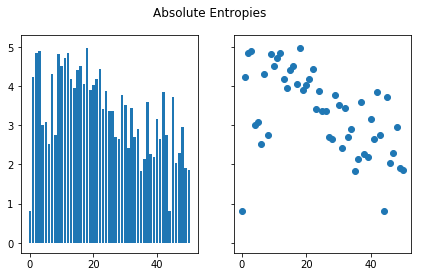

In [12]:

# Features Entropy

Info=dict((x,HfuncTS.H(
            StudyData,
            set([x]))) for x in UNIVARS)
#print(InfoUNIVARS)
plt.clf()
data=Info
names = range(len(list(data.keys())))
#names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
#axs[2].plot(names, values)
fig.suptitle('Absolute Entropies')

###'''

plt.show()



In [13]:

# Features Entropy

entro=[(x,HfuncTS.H(
            StudyData,
            set([x]))) for x in ADIP]
print(entro)

[('Netrin-1 Tessuto adiposo', 3.4095755786240125), ('UNC5B Tessuto adiposo', 3.8847773116296604), ('Caveolin-1 Tessuto adiposo', 3.3650701572315977), ('Vitamin D receptor (VDR) Tessuto adiposo', 3.3660000234530734), ('IL-8 Tessuto adiposo', 2.7115775889747438), ('MIP-1A Tessuto adiposo', 2.6517357938239767), ('MIP-2 Tessuto adiposo', 3.7682192561221823), ('TIMP1 Tessuto adiposo', 3.5152397453387563), ('Granzyme B Tessuto adiposo', 2.4122292559298733), ('Caspase 3 Tessuto adiposo', 3.4344514781520954), ('Caspase 7 Tessuto adiposo', 2.699333356786407), ('PARP 1 Tessuto adiposo', 2.911595224863449), ('HIF-1A Tessuto adiposo', 1.8415157524034824), ('WISP 1 Tessuto adiposo', 2.139618423074452), ('CYP27A1 Tessuto adiposo', 3.595453978104019), ('CYP2R1 Tessuto adiposo', 2.2714946315031357), ('CYP27B1 tessuto adiposo', 2.2006986479475787), ('DPP4 Tessuto adiposo', 3.150592724911526), ('BVRA Tessuto adiposo', 2.650357866704445)]


In [14]:
print(HfuncTS.II(StudyData, set(['CYP27A1 Tessuto epatico','CYP2R1 Tessuto epatico','CYP27B1 tessuto epatico','DPP4 Tessuto epatico','BVRA Tessuto epatico']),set(['Nas Score: Steatosi: grado'])))

0.9531754051774818


In [15]:
print(HfuncTS.II(StudyData, 
                 set(['CYP27A1 Tessuto epatico','CYP2R1 Tessuto epatico','CYP27B1 tessuto epatico','DPP4 Tessuto epatico','BVRA Tessuto epatico']),
                 set(set(EPASCORES))))

0.9340586479642904


In [18]:
print(HfuncTS.H(StudyData, set(StudyData.columns)))
print(HfuncTS.H(StudyData, set(ADIP)))
print(HfuncTS.H(StudyData, set(EPASCORES)))
print(HfuncTS.H(StudyData, set(EPAT)))
print(HfuncTS.H(StudyData, set(PHENO)))
print(HfuncTS.H(StudyData, set(SERUM)))
print(HfuncTS.H(StudyData, set(UNIVARS)))


#FEATURES_INFO=dict((x,HfuncTS.H(StudyData,set(x))) for x in FEATURES)

5.491853096329673
4.646214256218338
3.9124464782482495
4.388222245675298
5.386188929614931
5.491853096329673
5.491853096329673


In [19]:
print(HfuncTS.H(StudyData, 
                 set(['CYP27A1 Tessuto epatico','CYP2R1 Tessuto epatico','CYP27B1 tessuto epatico','DPP4 Tessuto epatico','BVRA Tessuto epatico'])))


4.388222245675298


In [20]:
#
#MINSUFF=minsuffI(df,)
Discard=set()
OUTT=set(ADIP)
#In=set(UNIVARS- Discard - Out)
INN=set(ADIP)-Discard
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print(MINSUFF)


{'Vitamin D receptor (VDR) Tessuto adiposo', 'Caspase 3 Tessuto adiposo', 'UNC5B Tessuto adiposo'}


In [43]:
#MINSUFF=minsuffI(df,)
Discard=set({'TIMP1 Tessuto adiposo', 'IL-8 Tessuto adiposo', 'BVRA Tessuto adiposo','PARP 1 Tessuto adiposo', 'Netrin-1 Tessuto adiposo', 'CYP27A1 Tessuto adiposo','Caveolin-1 Tessuto adiposo', 'MIP-2 Tessuto adiposo', 'CYP27B1 tessuto adiposo','Vitamin D receptor (VDR) Tessuto adiposo', 'Caspase 3 Tessuto adiposo', 'UNC5B Tessuto adiposo'})
OUTT=set(ADIP)
#In=set(UNIVARS- Discard - Out)
INN=set(ADIP)-Discard
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print(MINSUFF)


{'Caspase 7 Tessuto adiposo', 'HIF-1A Tessuto adiposo', 'DPP4 Tessuto adiposo', 'MIP-1A Tessuto adiposo', 'Granzyme B Tessuto adiposo'}


In [21]:
#print(HfuncTS.II(StudyData,set(MINSUFF),set(ADIP)))
INFSUFF=dict((x,HfuncTS.II(StudyData,set([x]),set(ADIP)-set([x]))) for x in MINSUFF)
print(INFSUFF)

{'Vitamin D receptor (VDR) Tessuto adiposo': 0.7244607841638236, 'Caspase 3 Tessuto adiposo': 0.7391935215978342, 'UNC5B Tessuto adiposo': 0.8361166957443696}


In [22]:
#information relations EPASCORES ADIP
print(HfuncTS.II(StudyData,set(EPASCORES),set(ADIP)))
HfuncTS.II(StudyData,set(ADIP),set(EPASCORES))


0.842071902519769


1.0

In [23]:
#information relations EPASCORES EPAT
print(HfuncTS.II(StudyData,set(EPASCORES),set(EPAT)))
HfuncTS.II(StudyData,set(EPAT),set(EPASCORES))


0.832787006470961


0.9340586479642904

In [24]:
#information relations SERUM ADIP
print(HfuncTS.II(StudyData,set(SERUM),set(ADIP)))
HfuncTS.II(StudyData,set(ADIP),set(SERUM))


1.0


0.8460193990482932

In [25]:
#information relations SERUM+PHENO ADIP
ANAM=set(SERUM) | set(PHENO)
print(HfuncTS.II(StudyData,set(ANAM),set(ADIP)))
HfuncTS.II(StudyData,set(ADIP),set(ANAM))


1.0


0.8460193990482932

In [26]:
#information relations SERUM PHENO 
print(HfuncTS.II(StudyData,set(SERUM),set(PHENO)))
HfuncTS.II(StudyData,set(PHENO),set(SERUM))
#information relations SERUM+PHENO ADIP

1.0


0.980759833728007

In [39]:
#information relations ADIP EPAT
print(HfuncTS.II(StudyData,set(ADIP),set(EPAT)))
HfuncTS.II(StudyData,set(EPAT),set(ADIP))


1.0


0.9444726402365642

In [27]:
#information relations SERUM EPASCORES
print(HfuncTS.II(StudyData,set(SERUM),set(EPASCORES)))
HfuncTS.II(StudyData,set(EPASCORES),set(SERUM))


1.0


0.7124091649252279

In [28]:
#information relations SERUM EPA
EPA=set(EPASCORES)|set(EPAT)
print(HfuncTS.II(StudyData,set(SERUM),EPA))
HfuncTS.II(StudyData,EPA,set(SERUM))


1.0


0.8460193990482932

In [29]:
#information relations EPASCORES+EPAT  ADIP
EPA=set(EPASCORES)|set(EPAT)
print(HfuncTS.II(StudyData,set(EPA),set(ADIP)))
HfuncTS.II(StudyData,set(ADIP),set(EPA))


1.0


1.0

In [30]:
#
#MINSUFF=minsuffI(df,)
Discard=['TSH']
OUTT=set(['Nas Score: Steatosi: grado'])
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)-set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)



  {'DPP4 Activity', 'HbA1c'}


In [34]:
#MINSUFF=minsuffI(df,)

Discard=['HbA1c']
OUTT=set(EPASCORES)
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)-set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)



  {'DPP4 Activity', 'TSH'}


In [31]:
#
#MINSUFF=minsuffI(df,)
Discard=[]
OUTT=set(EPASCORES)
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)- set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)




  {'DPP4 Activity', 'TSH'}


In [32]:
print(HfuncTS.II(StudyData,set(['DPP4 Activity']),set(EPASCORES)))
HfuncTS.II(StudyData,set(['HbA1c']),set(EPASCORES))


0.8818195773203639


0.6081240338819525

In [33]:
#MINSUFF=minsuffI(df,)
Discard=['TSH','HbA1c']
OUTT=set(EPASCORES)
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)-set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)



  {'HDLmg/dl', 'DPP4 Activity', 'ALTUL'}


In [35]:
#MINSUFF=minsuffI(df,)
Discard=['TSH','HbA1c','HDLmg/dl']
OUTT=set(EPASCORES)
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)-set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)



  {'DPP4 Activity', 'Glimg/dl'}


In [36]:
#MINSUFF=minsuffI(df,)
Discard=['TSH','HbA1c','HDLmg/dl','Glimg/dl']
OUTT=set(EPASCORES)
#In=set(UNIVARS- Discard - Out)
INN=set(SERUM)-set(Discard)
MINSUFF= HfuncTS.minsuffI(StudyData,INN,OUTT)
print('\n ',MINSUFF)



  {'DPP4 Activity', 'CTmg/dl'}
